In [1]:
import numpy as np 
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

C:\Users\jyani\anaconda3\envs\pytorch1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
image = Image.open("frame_100.jpg")

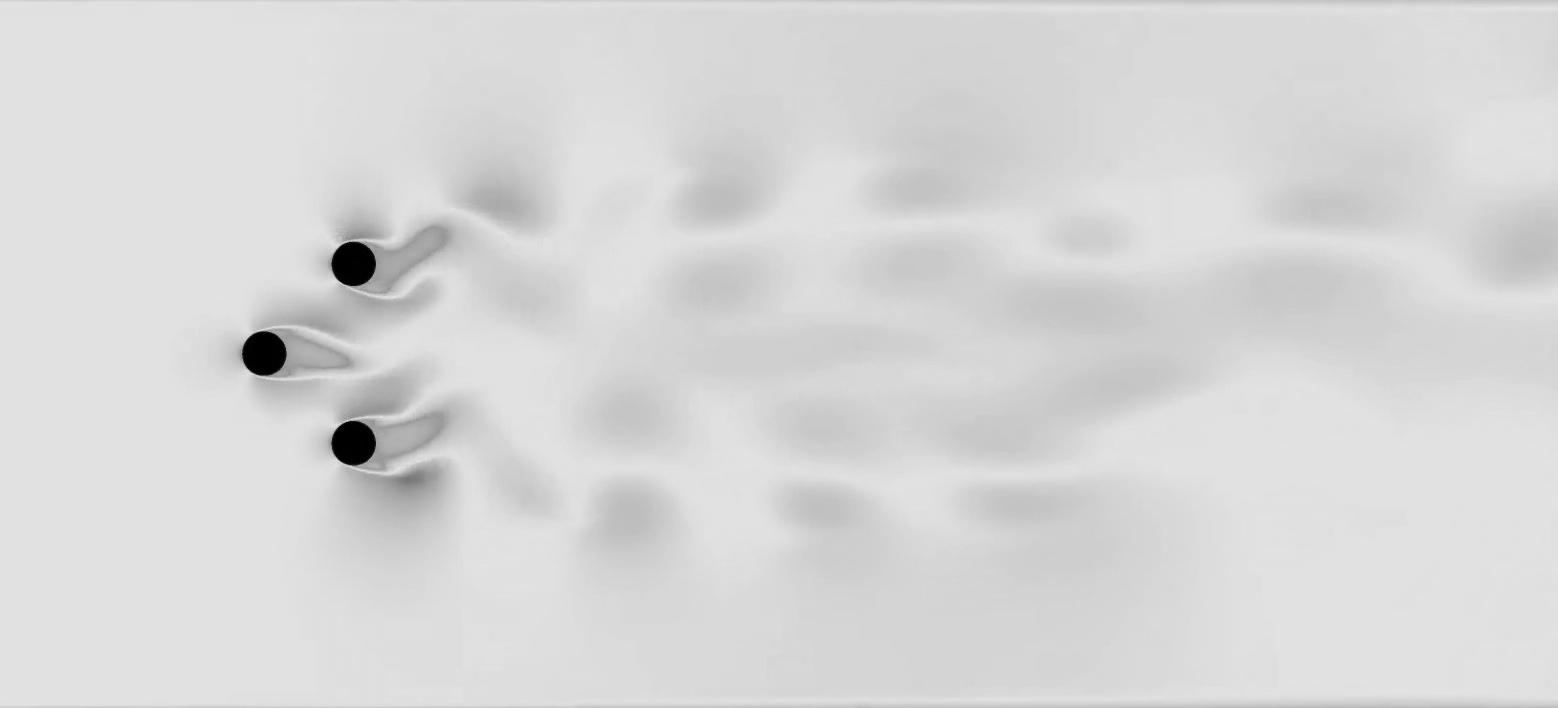

In [3]:
image

In [4]:
image_array = np.array(image)

In [5]:
print(image.size)

(1558, 708)


In [6]:
import numpy as np
import torch
import torch.nn as nn

# Define your SRGAN generator model
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        # Define your generator architecture here
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=12, stride=1, padding=10),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64,64 , kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 1, kernel_size=9, stride=1, padding=4),
            nn.Tanh()
        )

    def forward(self, x):
        # Forward pass through your generator
        return self.model(x)

# Example usage
# Assuming `image` is your input image
image_array = np.asarray(image)  # Assuming you've loaded your image
# Add channel dimension
image_array = np.expand_dims(image_array, axis=0)
# Convert to tensor
image_tensor = torch.Tensor(image_array)
generator = Generator()
output_image = generator(image_tensor)
print(output_image.shape)  # Output shape


C:\Users\jyani\AppData\Local\Temp\ipykernel_16080\3229791854.py:47: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_numpy.cpp:212.)
  image_tensor = torch.Tensor(image_array)


torch.Size([1, 717, 1567])


In [7]:
output_image.size()

torch.Size([1, 717, 1567])

In [8]:
image.size

(1558, 708)

In [9]:
image_array.std()

17.164658924205135

In [10]:
output_image.std()

tensor(0.0006, grad_fn=<StdBackward0>)

In [11]:
array = output_image.detach().numpy()

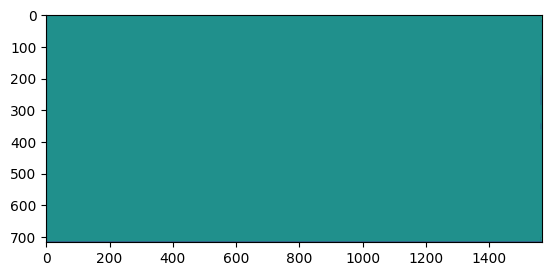

In [12]:
import torch
from PIL import Image

# Assuming output_image is your tensor
# First, convert the tensor to a NumPy array
output_array = output_image.detach().numpy()

# Assuming your tensor represents an image in the range [-1, 1], you may want to rescale it to [0, 255] for visualization
output_array = ((output_array + 1) / 2 * 255).astype('uint8')

# Convert the NumPy array to an image using PIL
output_image = Image.fromarray(output_array.squeeze(), mode='L')  # mode='L' for grayscale images

# Now you can save or display the image
plt.imshow(output_image)
plt.show()  # Display the image


In [3]:
import torch
import torchvision.transforms as transforms
from PIL import Image
from models import SRGAN  # Import the SRGAN model class from the provided code

# Function to download weights
def download_weights(model_name):
    import subprocess
    subprocess.call(['bash', './scripts/download_weights.sh', model_name])

# Download weights if not already downloaded
download_weights('SRGAN_x4-SRGAN_ImageNet')

# Load the pre-trained SRGAN model
srgan_model = SRGAN()
srgan_model.load_state_dict(torch.load('./results/pretrained_models/SRGAN_x4-SRGAN_ImageNet.pth.tar')['generator'])

# Set the model to evaluation mode
srgan_model.eval()

# Define a function to upscale an image using the SRGAN model
def upscale_image(image_path):
    # Load and preprocess the input image
    input_image = Image.open(image_path).convert('RGB')
    input_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])
    input_image = input_transform(input_image).unsqueeze(0)
    
    # Generate the super-resolved image
    with torch.no_grad():
        sr_image = srgan_model(input_image)
    
    # Post-process the output image
    sr_image = (sr_image.clamp(0, 1).squeeze(0).cpu().numpy().transpose(1, 2, 0) + 1) / 2.0 * 255.0
    sr_image = Image.fromarray(sr_image.astype('uint8'))
    
    return sr_image

# Example usage
input_image_path = 'frame_0.jpg'
output_image = upscale_image(input_image_path)
output_image.save('output_image.jpg')


ModuleNotFoundError: No module named 'models'

In [4]:
# Download SRGAN_x4-SRGAN_ImageNet.pth.tar weights to ./results/pretrained_models
$ bash ./scripts/download_weights.sh SRGAN_x4-SRGAN_ImageNet

# Download SRResNet_x4-SRGAN_ImageNet.pth.tar weights to ./results/pretrained_models
$ bash ./scripts/download_weights.sh SRResNet_x4-SRGAN_ImageNet

# Download DiscriminatorForVGG_x4-SRGAN_ImageNet.pth.tar weights to ./results/pretrained_models
$ bash ./scripts/download_weights.sh DiscriminatorForVGG_x4-SRGAN_ImageNet

SyntaxError: invalid syntax (3289771658.py, line 2)